<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

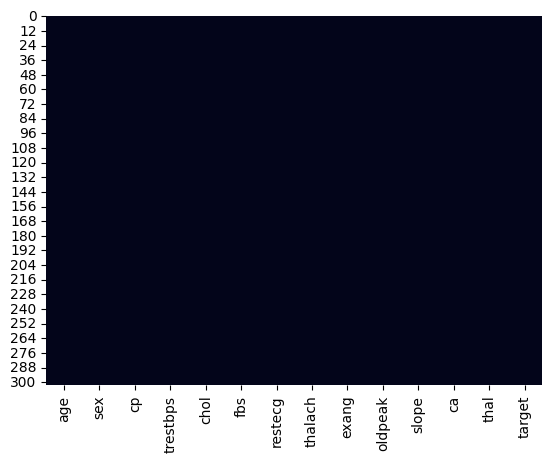

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv'
df = pd.read_csv(url)

df.info(), df.describe()
sns.heatmap(df.isnull(), cbar=False)

# Univariate analysis

##Categorical Analysis

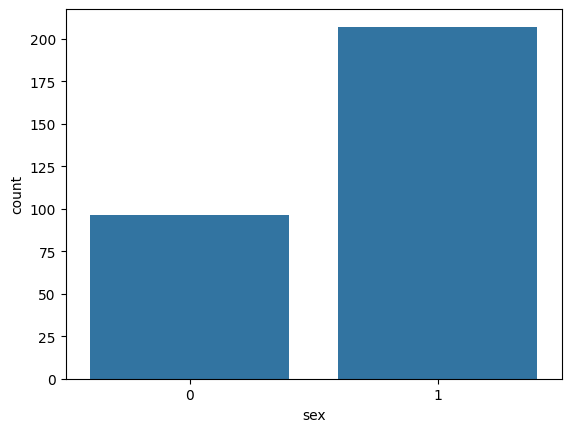

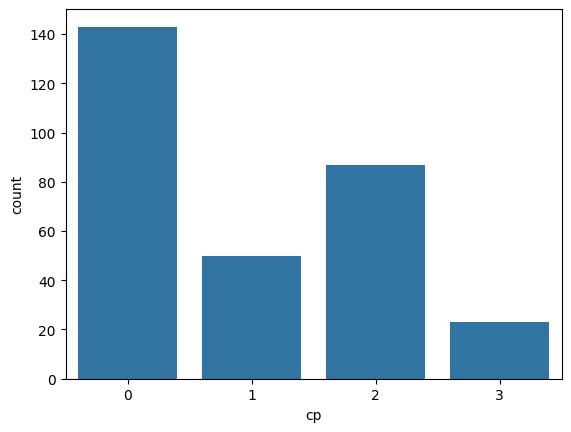

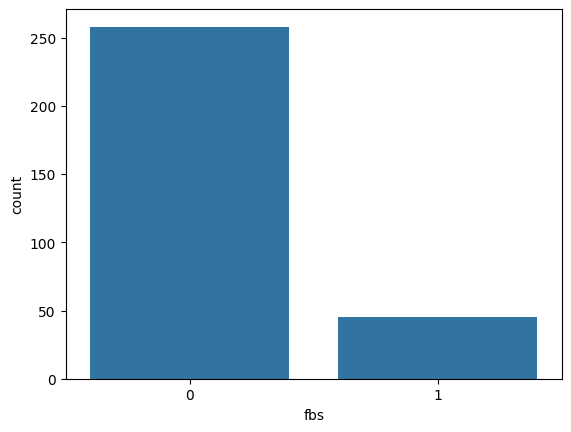

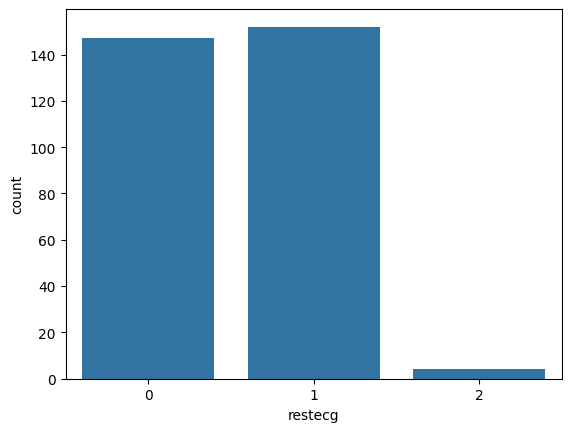

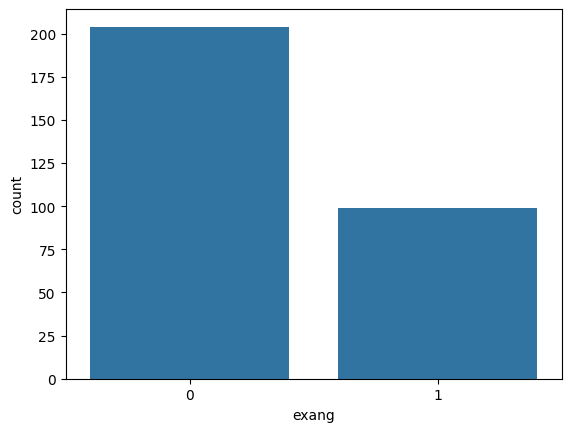

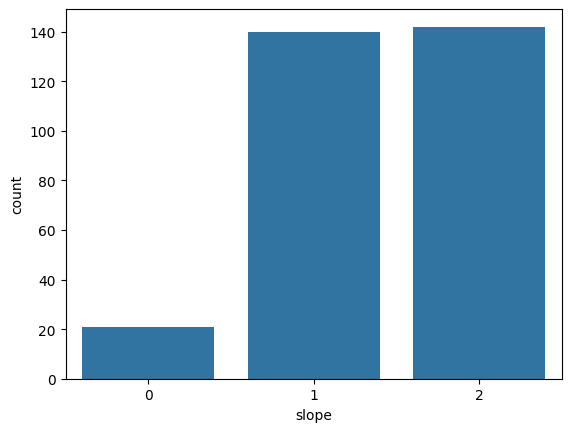

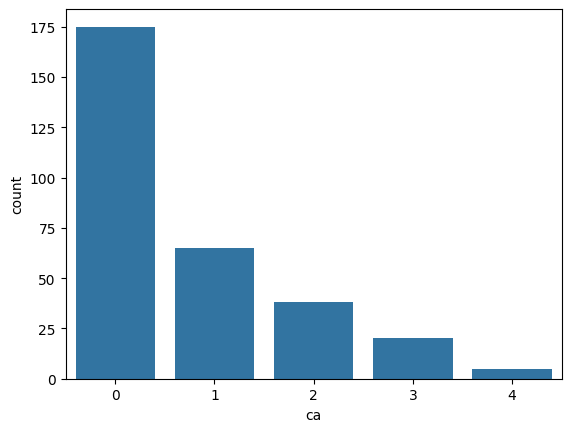

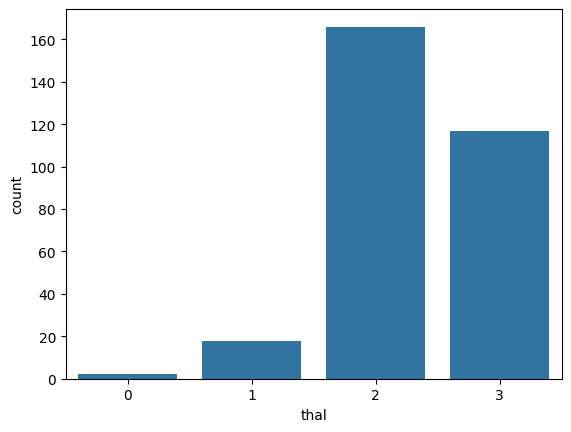

In [6]:
for col in ['sex','cp','fbs','restecg','exang','slope','ca','thal']:
    sns.countplot(x=col, data=df)
    plt.show()

## Numerical Analysis

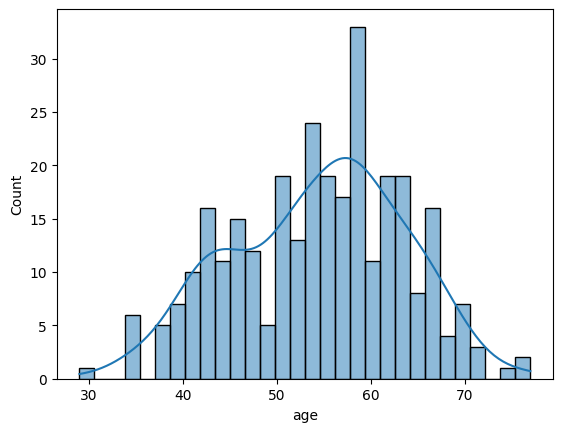

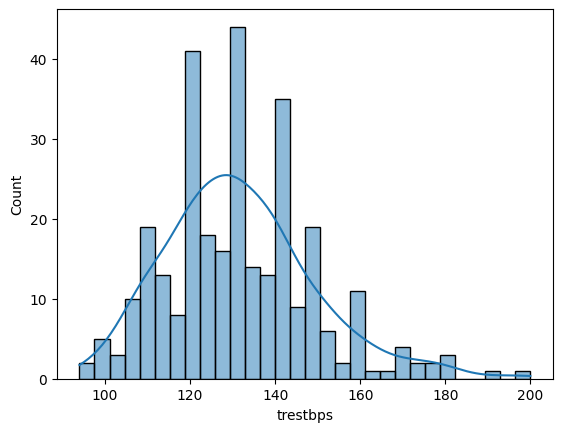

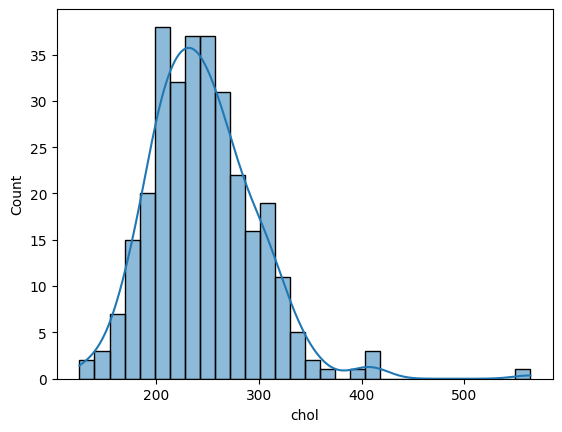

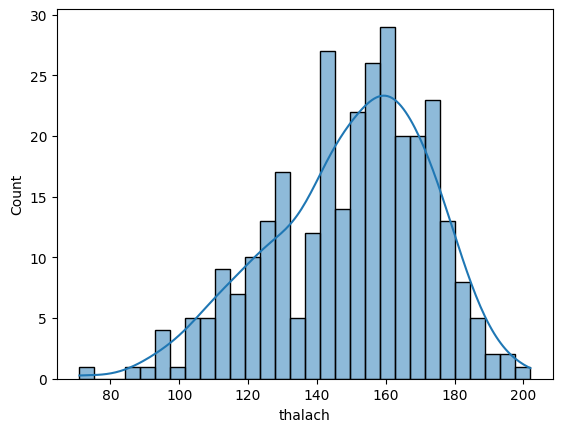

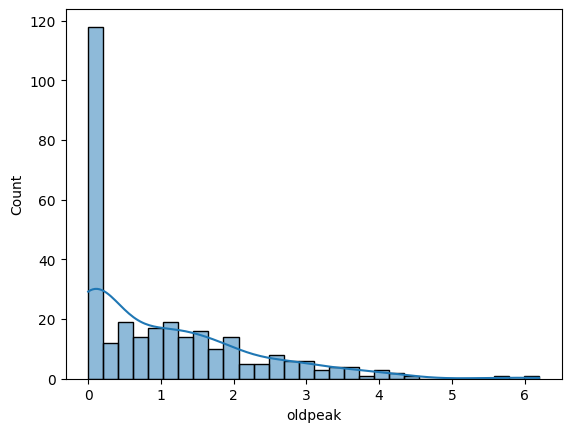

In [7]:
for col in ['age','trestbps','chol','thalach','oldpeak']:
    sns.histplot(df[col], kde=True, bins=30)
    plt.show()

## Detecting outliers

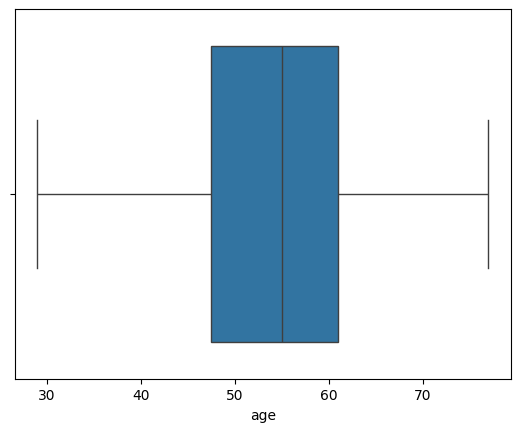

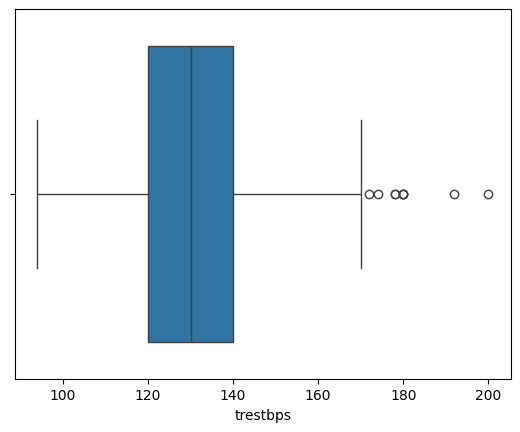

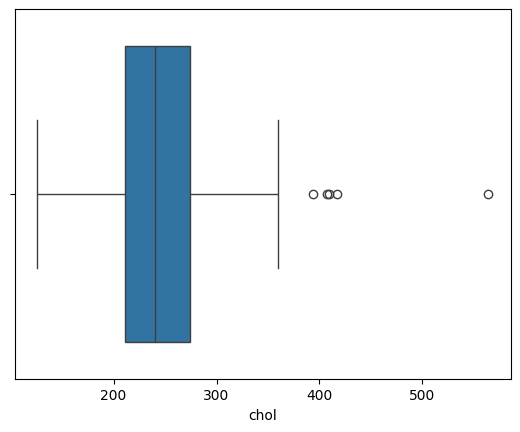

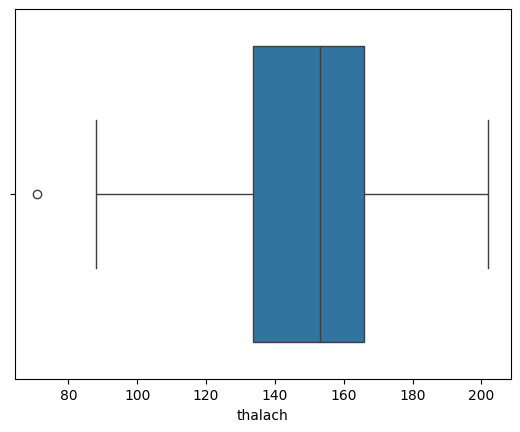

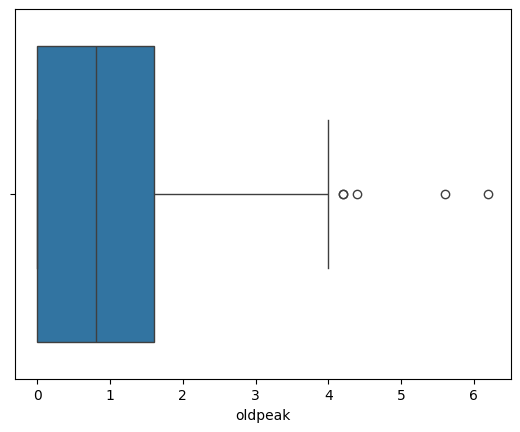

In [8]:
for col in ['age','trestbps','chol','thalach','oldpeak']:
    sns.boxplot(x=df[col])
    plt.show()

# Bivariate analysis

## Correlation checking

<Axes: >

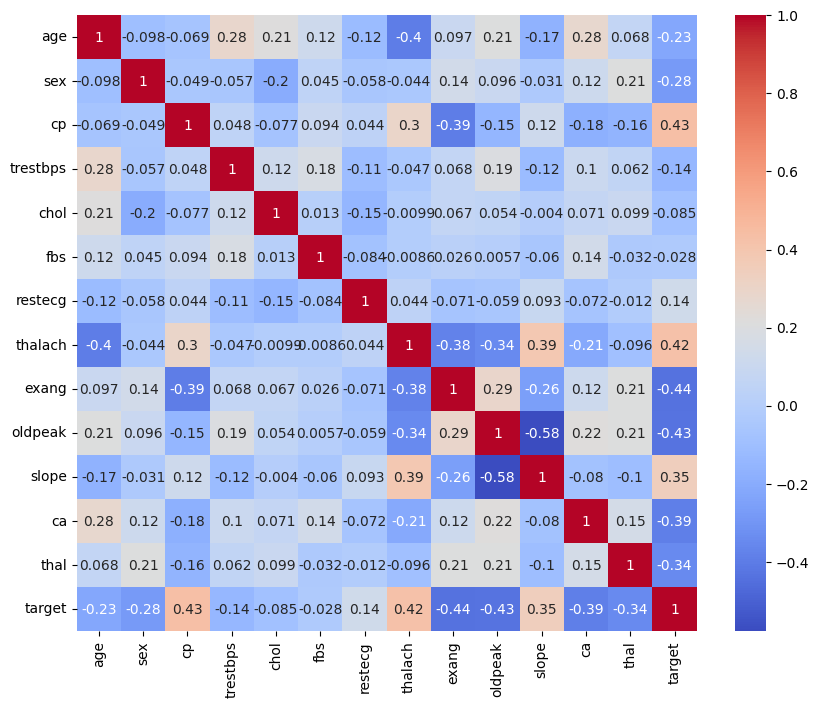

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Feature vs target

<Axes: xlabel='cp', ylabel='count'>

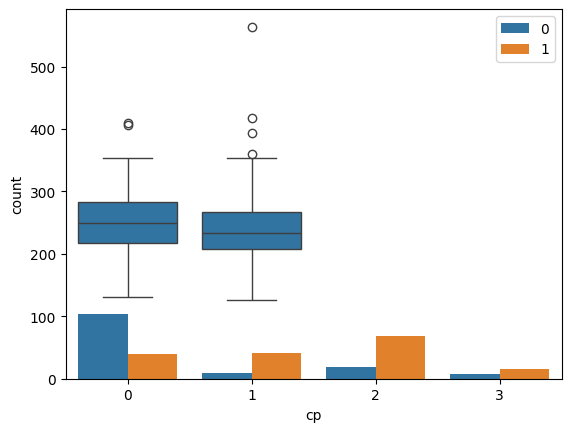

In [10]:
sns.countplot(x='cp', hue='target', data=df)
sns.boxplot(x='target', y='chol', data=df)

# Multivariae analysis

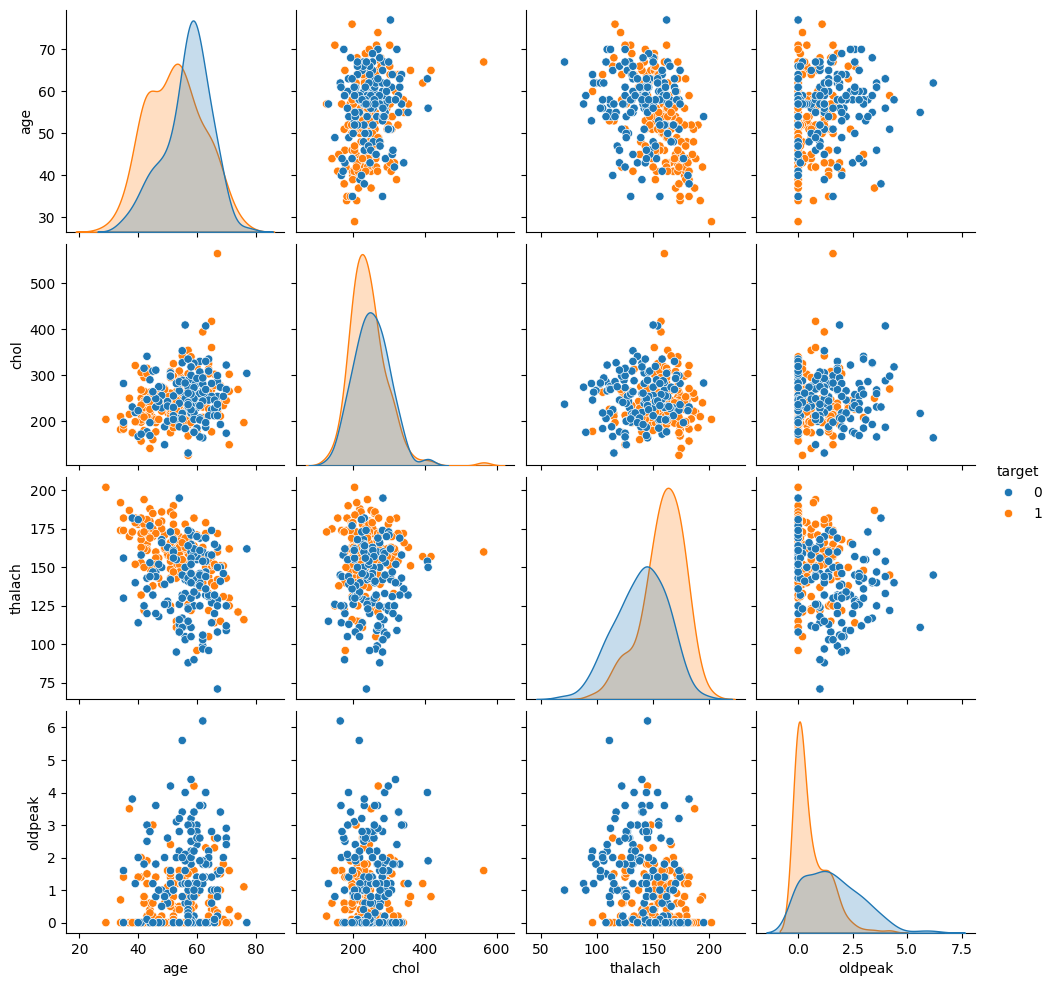

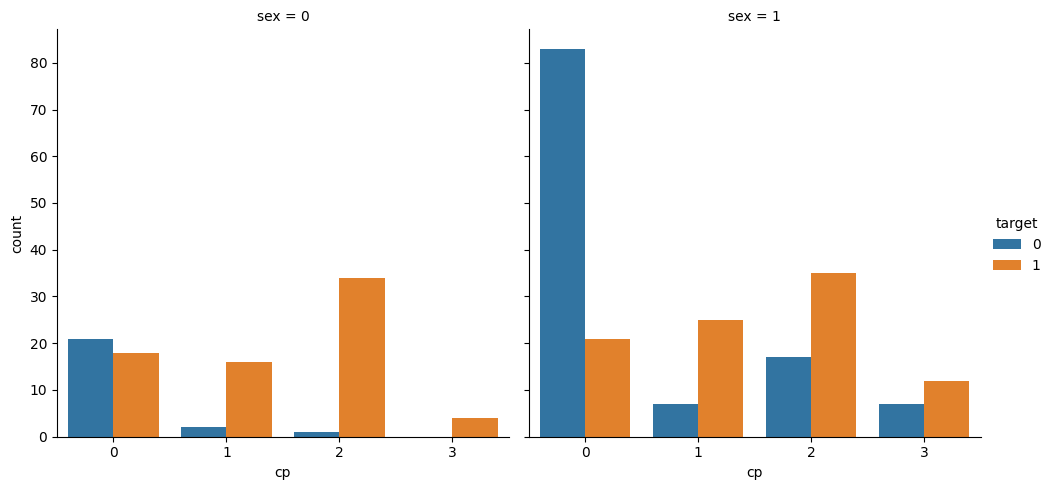

In [11]:
sns.pairplot(df[['age','chol','thalach','oldpeak','target']], hue='target')
sns.catplot(x='cp', col='sex', hue='target', kind='count', data=df)

## Grouped bar plot

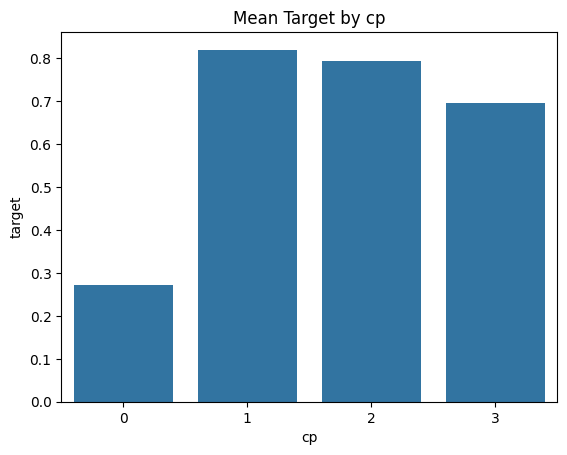

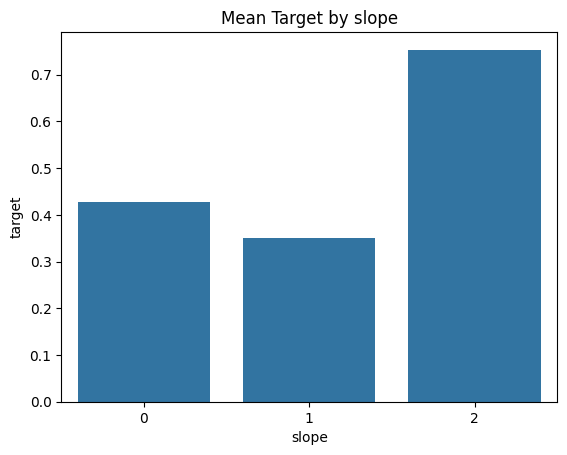

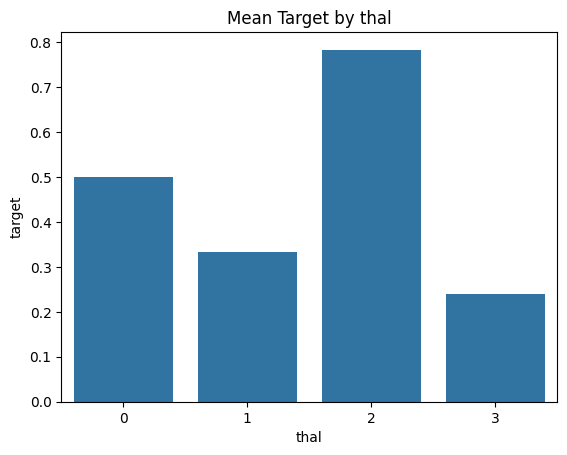

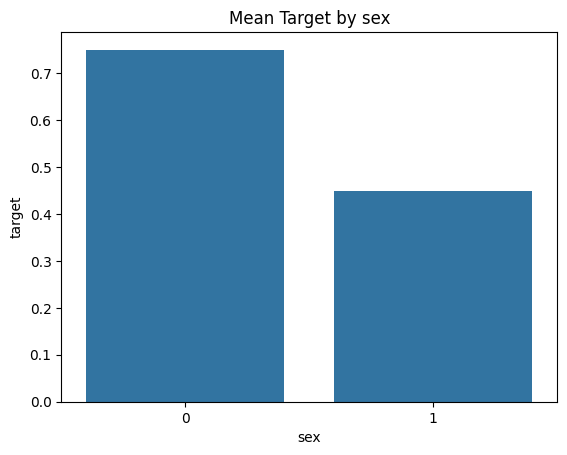

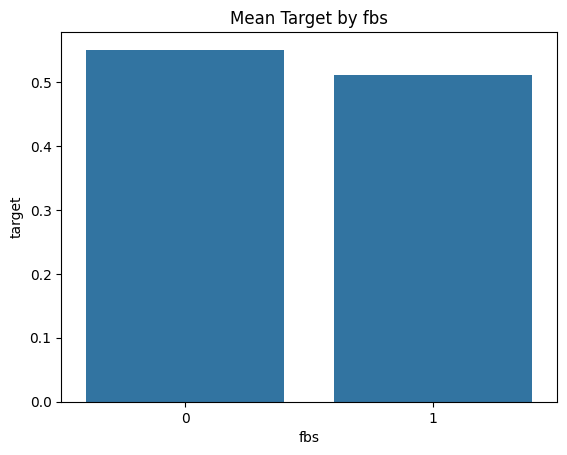

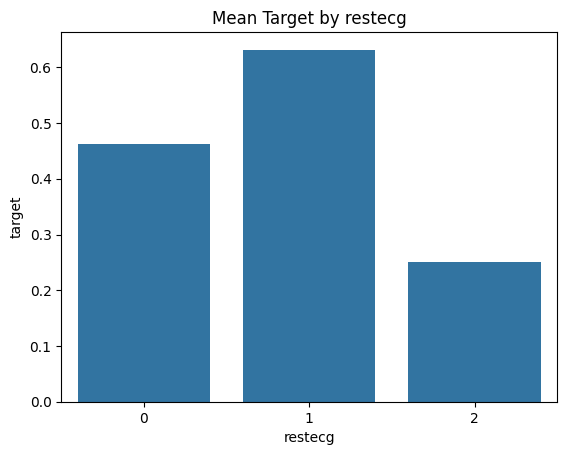

In [12]:
categorical = ['cp', 'slope', 'thal', 'sex', 'fbs', 'restecg']

for col in categorical:
    mean_target = df.groupby(col)['target'].mean().reset_index()
    sns.barplot(x=col, y='target', data=mean_target)
    plt.title(f'Mean Target by {col}')
    plt.show()


## Pair plot

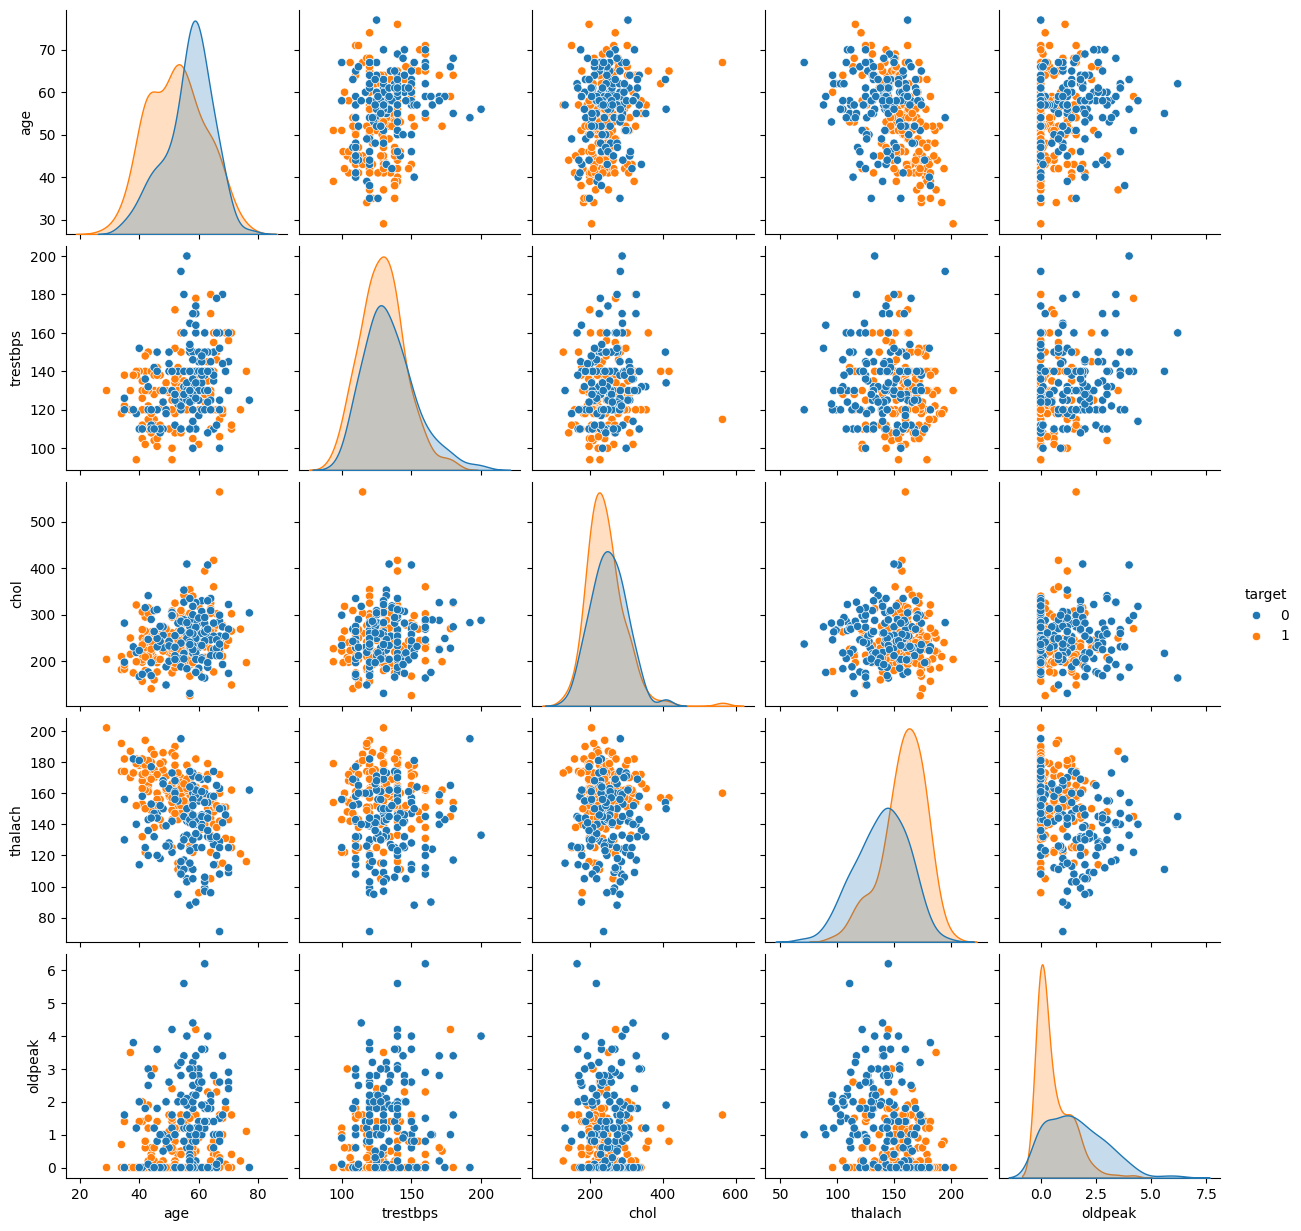

In [13]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')


#Heatmap of Target Correlation with Features

Text(0.5, 1.0, 'Correlation of All Features with Target')

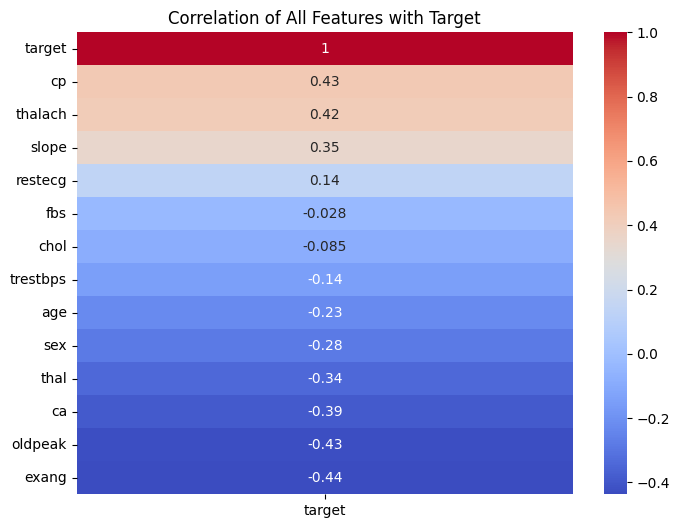

In [14]:
import numpy as np

plt.figure(figsize=(8, 6))
cor = df.corr()
sns.heatmap(cor[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of All Features with Target")


# Final Insights

- cp (chest pain type) and thalach (max heart rate) are strong positive indicators of heart disease.

- exang, oldpeak, slope, and ca show strong negative correlation with heart disease.

- Age and cholesterol are less predictive when isolated.

- Sex plays a role: Males dominate in frequency and in heart disease cases.

- thal (thalassemia test result) seems important — class 2 associated with higher disease probability.

- Target separation is fairly clean in some features — hinting that this dataset may be modelable with good accuracy.